In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
# Add random noise to images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [4]:
# Clip values to be within [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
# Define denoising autoencoder model
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 images

In [6]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [7]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [8]:
# Compile the autoencoder
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [9]:
# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=25, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/25
391/391 [==============================] - 11s 14ms/step - loss: 0.5789 - val_loss: 0.5694
Epoch 2/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5668 - val_loss: 0.5664
Epoch 3/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5649 - val_loss: 0.5651
Epoch 4/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5639 - val_loss: 0.5641
Epoch 5/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5632 - val_loss: 0.5645
Epoch 6/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5627 - val_loss: 0.5631
Epoch 7/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5623 - val_loss: 0.5629
Epoch 8/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5619 - val_loss: 0.5628
Epoch 9/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5615 - val_loss: 0.5629
Epoch 10/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5613 - val_l

In [10]:
# Encode and decode some noisy test images
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


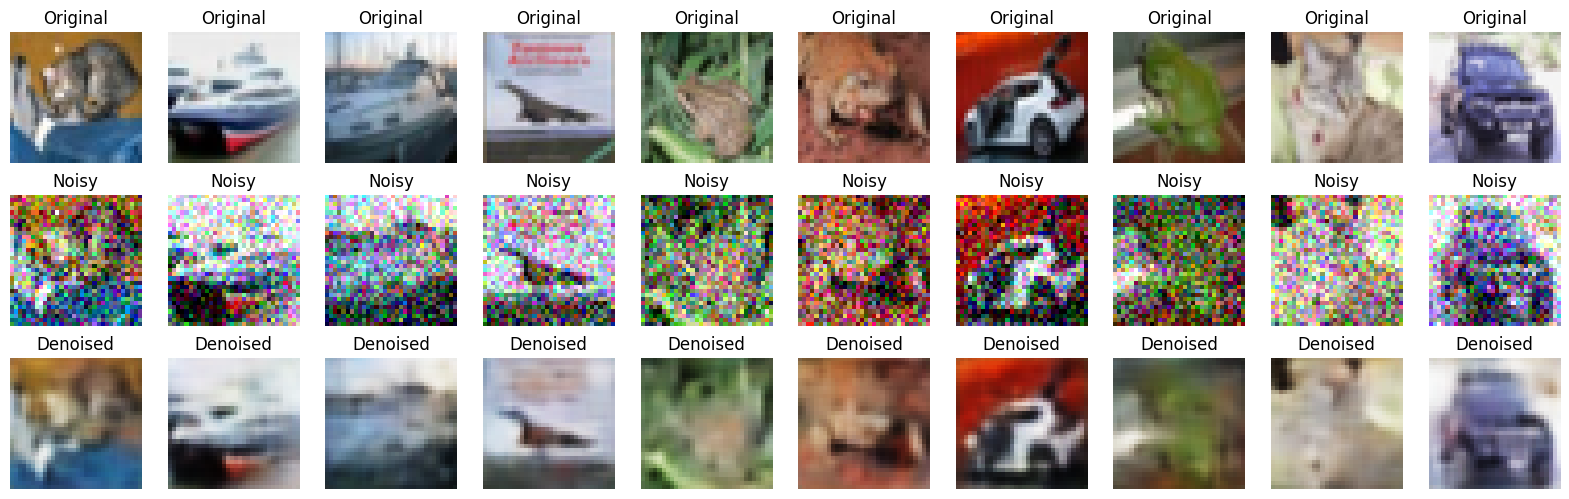

In [11]:
# Plot original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title('Noisy')
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title('Denoised')
    plt.axis('off')

plt.show()

In [11]:
https://drive.google.com/drive/folders/1VkyaySewITLRDYJBdcyxCMSYXmWKNakq